In [7]:
# Obtain the dataset from OA 5.10, which was collected from Worthy, S. L., 
# Jonkman, J. N., and Blinn-Pike, L. (2010). 
# Sensation-seeking, risk-taking, and problematic  financial behaviors of 
# college students. Journal of Family and Economic Issues, 31,  161–170. 
#
# For this dataset, the  researchers conducted a survey of 450 undergraduates 
# in large  introductory courses at either Mississippi State University or the 
# University of Mississippi. There were close to 150 questions on the survey, but 
# only four of these variables are  included in this dataset. (You can consult the 
# paper to learn how the variables beyond these  four affect the analysis.) 
#
# The primary interest for the researchers was factors relating to  whether 
# or not a student had ever overdrawn a checking account.  The dataset 
# contains the following variables:  
#
#     Age: Age of the student (in years)  
#     Sex: 0 = male or 1 = female  
#     DaysDrink: Number of days drinking alcohol (in past 30 days)  
#     Overdrawn: Has the student overdrawn a checking account? 0 = no or 1 = yes  
#
# Create a decision-tree-based model to predict the student overdrawing from 
# the  checking account based on Age, Sex, and DaysDrink. Since DaysDrink is 
# a numeric  variable you may have to convert it into a categorical one. One 
# suggestion for that  would be:  
#   
# if (no. days drinking alcohol < 7) = 0  
#     (7 <= no. days drinking alcohol < 14) = 1  
#     (no. days drinking alcohol >= 14) = 2 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz  

# Import and print dataset for evaluation and preparation of data
df = pd.read_csv("../Datasets/Code_and_Data_(Chapter_05)/Code and Data (Chapter 05)/overdrawn.csv")
print (df)

# Dropping the NaN values
df = df.dropna()

# Create feature set and target variable
X = df.drop(columns='Overdrawn') 
y = df['Overdrawn']

# Create the test split using 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

      Age  Sex  DaysDrink  Overdrawn
0    19.0  1.0        3.0        0.0
1    19.0  0.0       20.0        0.0
2    19.0  0.0        6.0        0.0
3    19.0  1.0       10.0        0.0
4    19.0  1.0        0.0        0.0
..    ...  ...        ...        ...
445  19.0  1.0        1.0        0.0
446  18.0  0.0        0.0        0.0
447  20.0  1.0        8.0        1.0
448  19.0  1.0        8.0        0.0
449  20.0  0.0        0.0        0.0

[450 rows x 4 columns]


In [14]:
# Create the decision tree model, train it on our split data, and make some predictions
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

# Print the accuracy score and confusion matrix to evaluate the model
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8295454545454546
[[72  8]
 [ 7  1]]


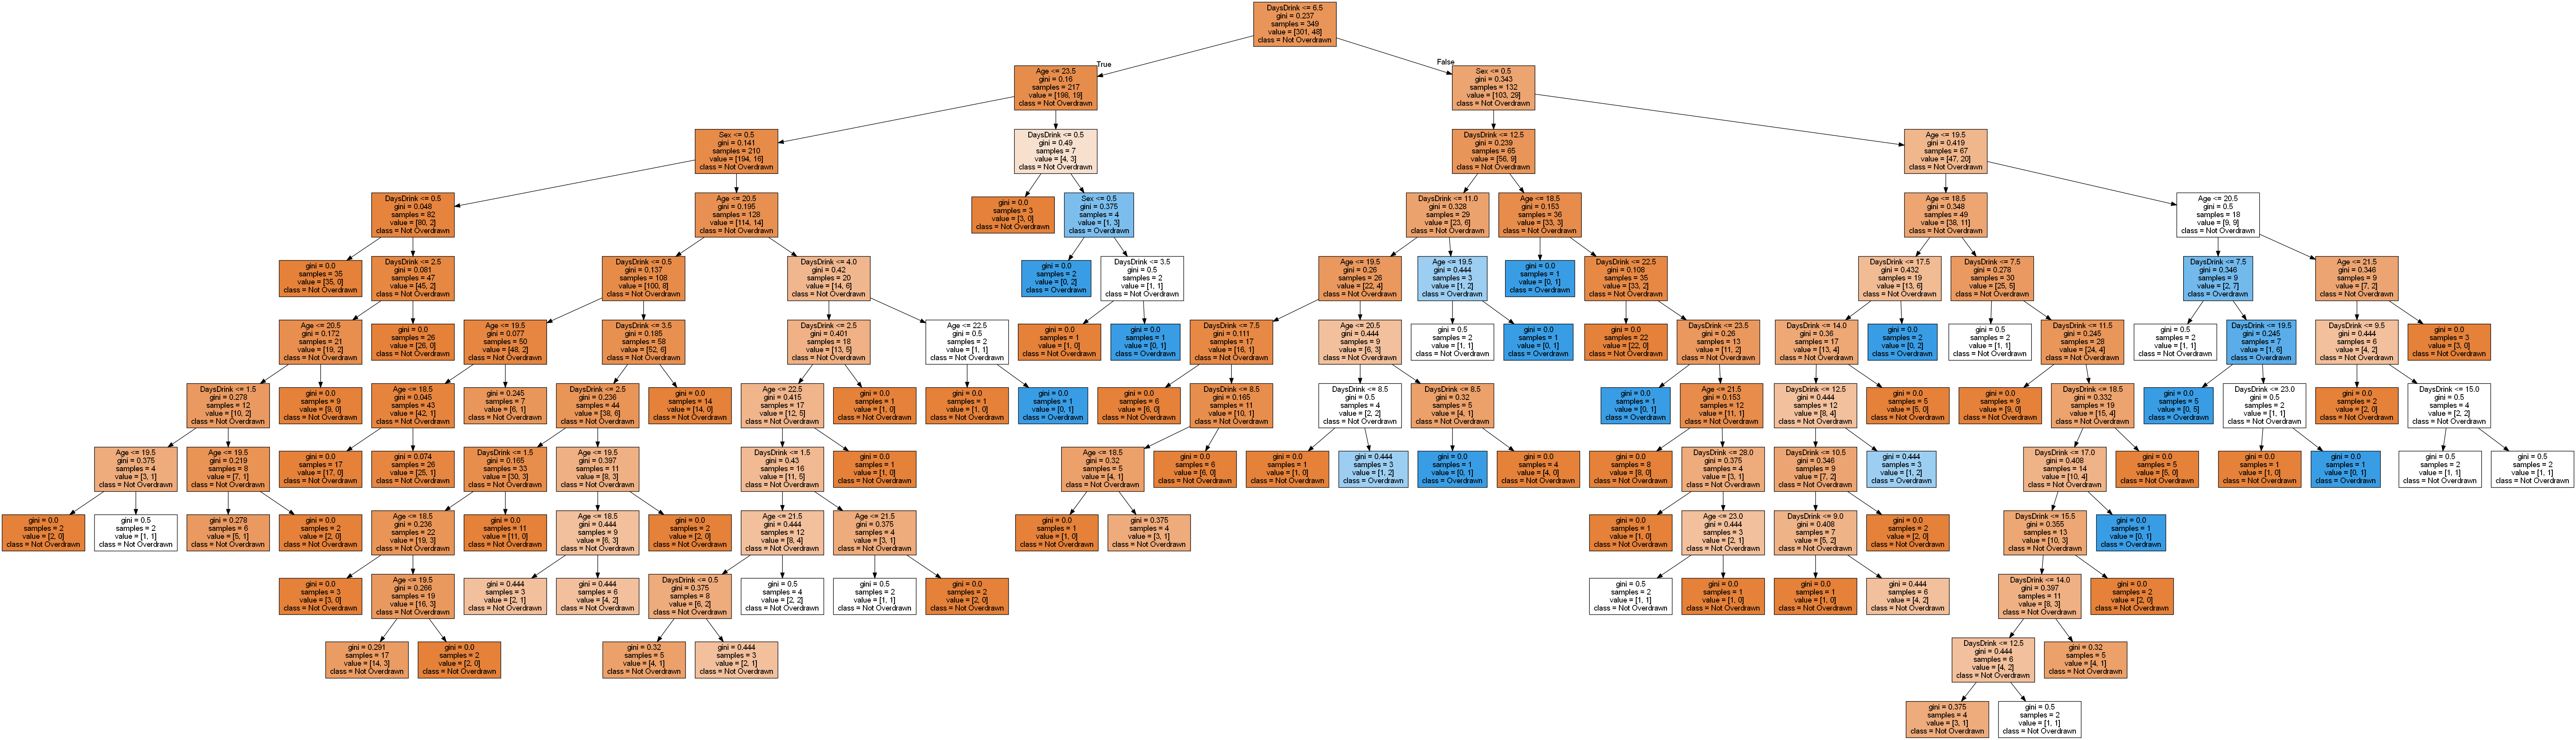

In [17]:
# Visualize the results
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=('Age', 'Sex', 'DaysDrink'),  
                                class_names=('Not Overdrawn','Overdrawn'),  
                                filled=True)  
graph = graphviz.Source(dot_data, format="png")  
graph.render('overdrawn')  

from IPython.display import Image
Image(filename='overdrawn.png')